# PMDS Codon Index Visualisierung

Dieses Notebook Visualisiert die Index abhängigkeit von den Codons in einer Sequenz.

In [382]:
from Bio import SeqIO
from Bio.Seq import Seq

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap

In [383]:
possible_amino_acids = [('A', 'Alanine'), ('R', 'Arginine'), ('N', 'Asparagine'), ('D', 'Aspartic acid'), ('C', 'Cysteine'),
                        ('E', 'Glutamic acid'), ('Q', 'Glutamine'), ('G', 'Glycine'), ('H', 'Histidine'), ('I', 'Isoleucine'),
                        ('L', 'Leucine'), ('K', 'Lysine'), ('M', 'Methionine'), ('F', 'Phenylalanine'), ('P', 'Proline'),
                        ('S', 'Serine'), ('T', 'Threonine'), ('W', 'Tryptophan'), ('Y', 'Tyrosine'), ('V', 'Valine')]

selected_amino_acid = ('A', 'Alanine')

In [384]:
fasta_file = "../data/E.Coli/GCA_000005845.2/cds_from_genomic.fna"

In [385]:
records = []
for record in SeqIO.parse(fasta_file, format="fasta"):
    records.append(str(record.seq))


In [386]:
from itertools import product
from collections import defaultdict as ddict

codon_list = ["".join(i) for i in list(product("TCAG", repeat=3))]

translation_table = ddict(list)
for codon in codon_list:
    tr = str(Seq(codon).translate())
    translation_table[tr].append(str(codon))

print("codon_list", codon_list)
print("\ntranslation_table", dict(translation_table))

#print key and length of value
for key, value in translation_table.items():
    print(key, len(value))


codon_list ['TTT', 'TTC', 'TTA', 'TTG', 'TCT', 'TCC', 'TCA', 'TCG', 'TAT', 'TAC', 'TAA', 'TAG', 'TGT', 'TGC', 'TGA', 'TGG', 'CTT', 'CTC', 'CTA', 'CTG', 'CCT', 'CCC', 'CCA', 'CCG', 'CAT', 'CAC', 'CAA', 'CAG', 'CGT', 'CGC', 'CGA', 'CGG', 'ATT', 'ATC', 'ATA', 'ATG', 'ACT', 'ACC', 'ACA', 'ACG', 'AAT', 'AAC', 'AAA', 'AAG', 'AGT', 'AGC', 'AGA', 'AGG', 'GTT', 'GTC', 'GTA', 'GTG', 'GCT', 'GCC', 'GCA', 'GCG', 'GAT', 'GAC', 'GAA', 'GAG', 'GGT', 'GGC', 'GGA', 'GGG']

translation_table {'F': ['TTT', 'TTC'], 'L': ['TTA', 'TTG', 'CTT', 'CTC', 'CTA', 'CTG'], 'S': ['TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC'], 'Y': ['TAT', 'TAC'], '*': ['TAA', 'TAG', 'TGA'], 'C': ['TGT', 'TGC'], 'W': ['TGG'], 'P': ['CCT', 'CCC', 'CCA', 'CCG'], 'H': ['CAT', 'CAC'], 'Q': ['CAA', 'CAG'], 'R': ['CGT', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'], 'I': ['ATT', 'ATC', 'ATA'], 'M': ['ATG'], 'T': ['ACT', 'ACC', 'ACA', 'ACG'], 'N': ['AAT', 'AAC'], 'K': ['AAA', 'AAG'], 'V': ['GTT', 'GTC', 'GTA', 'GTG'], 'A': ['GCT', 'GCC', 'GCA', 'GCG'], 'D

In [387]:
translation_table[selected_amino_acid[0]]

['GCT', 'GCC', 'GCA', 'GCG']

In [388]:
# ['#EF476F', '#FFD166', '#06D6A0', '#118AB2', '#ff66ff', '#00ffff', '#073B4C', (0,0,0)] 
org_colors = ['#EF476F', '#FFD166', '#06D6A0', '#118AB2', '#073B4C', (0,0,0)]  # Hex color codes
color_padding = len(org_colors) - 1
color_default = len(org_colors) - 2

def get_colors(amino, colors=org_colors):
    # for key len get first colors
    
    syn_codon =  len(translation_table[amino[0]])
    color_used = colors[:syn_codon].copy()
    color_used = color_used + colors[-2:]
    return color_used

In [389]:
colors = org_colors

# get aminos where len is 4
amino_acids = [amino for amino in possible_amino_acids if len(translation_table[amino[0]]) == 4]
print("amino_acids", amino_acids)

selected_amino_acid = amino_acids[0]
print("selected_amino_acid", selected_amino_acid, translation_table[selected_amino_acid[0]])


amino_acids [('A', 'Alanine'), ('G', 'Glycine'), ('P', 'Proline'), ('T', 'Threonine'), ('V', 'Valine')]
selected_amino_acid ('A', 'Alanine') ['GCT', 'GCC', 'GCA', 'GCG']


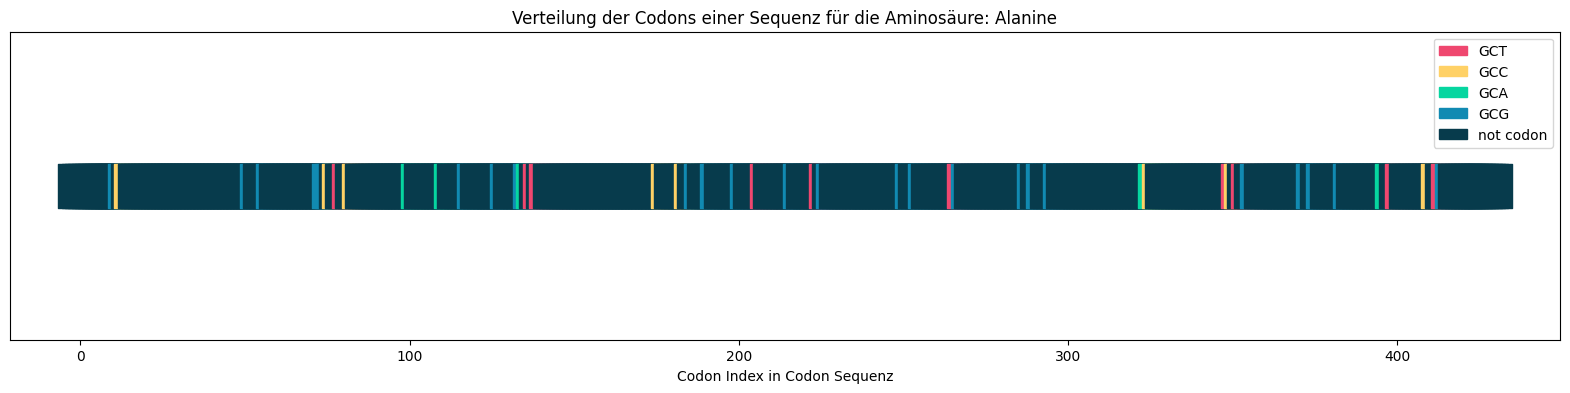

In [390]:
def visualize_mpl(record, selected_aa, colors):
    selected_codons = translation_table[selected_aa[0]]
    codons = [record[i:i + 3] for i in range(0, len(record), 3)]
    codon_ids = [selected_codons.index(c) if c in selected_codons else -1 for c in codons]

    unique_codon_ids = list(set(codon_ids))
    # Define own colors
    # Create a list to hold the colors for each index
    color_list = [colors[idx] if idx >= 0 else colors[-2] for idx in codon_ids]

    # Plotting
    plt.figure(figsize=(20, 4))
    plt.scatter(range(len(codon_ids)), [1] * len(codon_ids), color=color_list, s=1000, marker='s')
    plt.xlabel('Codon Index in Codon Sequenz')
    plt.title(f'Verteilung der Codons einer Sequenz für die Aminosäure: {selected_aa[1]}')
    plt.yticks([])  # Hide y-axis ticks

    # Create a custom legend
    unique_codon_ids = list(set(codon_ids))
    unique_selected_codons = [selected_codons[i] for i in unique_codon_ids][:-1] + ['not codon']
    patches = [mpl.patches.Patch(color=colors[i % len(colors)], label=unique_selected_codons[i]) for i in range(len(unique_codon_ids))]

    plt.legend(handles=patches, loc='upper right')
    plt.show()


visualize_mpl(records[3], selected_aa=selected_amino_acid, colors=colors)

- not codon: ein codon, welches nicht zur der Aminosäure gehört
- eine zufällig gewählte Sequenz

In [391]:
def get_color_matrix(records, selected_aa, show_records, colors, len_threshold=0.3):
    color_matrix = []

    max_len = max(len(record) for record in records) // 3
    avg_len = (sum(len(record) for record in records) // 3) / len(records)
    if len_threshold is not None:
        max_threshold = int(avg_len * (1 + len_threshold))
        min_threshold = int(avg_len * (1 - len_threshold))
    else:
        max_threshold = max_len
        min_threshold = 0

    print("max_len", max_len, "avg_len", round(avg_len, 2))
    color_padding = len(colors) - 1
    color_default = len(colors) - 2

    if show_records is not None:
        records = records[:show_records]
    else:
        records = records

    for record in records:
        #if len(record) is a outlier, we can skip it:
        if len_threshold is not None and (len(record) // 3 > max_threshold or len(record) // 3 < min_threshold):
            continue
        selected_codons = translation_table[selected_aa[0]]
        codons = [record[i:i + 3] for i in range(0, len(record), 3)]
        codon_ids = [selected_codons.index(c) if c in selected_codons else -1 for c in codons]
        # Create a list to hold the color indices for each codon
        color_indices = [idx if idx >= 0 else color_default for idx in codon_ids]
        # Pad color_indices with -1 to make it the same length as max_len
        color_indices += [color_padding] * (max_threshold - len(color_indices))
        color_matrix.append(color_indices)



    # sort color_matrix based on length for first color_padding elements
    len_of_codons = [len([1 for i in x if i != color_padding]) for x in color_matrix]
    # sort color_matrix based on length for first color_padding elements
    color_matrix = [x for _, x in sorted(zip(len_of_codons, color_matrix), key=lambda pair: pair[0])]

    # Convert color_matrix to a 2D numpy array
    return np.array(color_matrix)

color_matrix = get_color_matrix(records, show_records=252, selected_aa=selected_amino_acid, colors=colors, len_threshold=0.3)

# get all records
#color_matrix_all = get_color_matrix(records, show_records=None, selected_aa=selected_amino_acid, colors=colors, len_threshold=None)
#print("color_matrix_all shape:", color_matrix_all.shape)

print("color_matrix shape:", color_matrix.shape)

#count how often each color appears in the color_matrix
unique, counts = np.unique(color_matrix, return_counts=True)
print("unique idxs:", unique)
print("idx counts:", counts)

max_len 2359 avg_len 311.0
color_matrix shape: (100, 404)
unique idxs: [0 1 2 3 4 5]
idx counts: [  496   776   594   975 26629 10930]


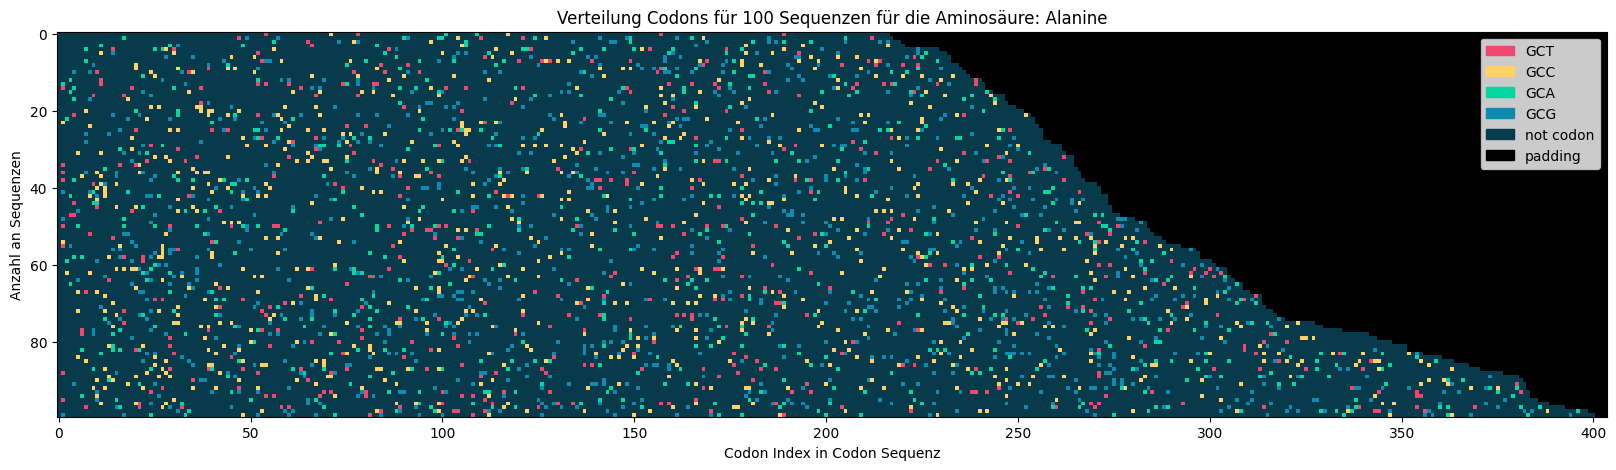

In [392]:

def visualize_color_matrix(color_matrix, selected_aa, colors):

    # Define own colors
    # dark green background = '#073B4C'
    cmap = ListedColormap(colors)

    plt.figure(figsize=(20, 5))
    plt.imshow(color_matrix, aspect='auto', cmap=cmap, vmin=0, vmax=5)
    plt.xlabel('Codon Index in Codon Sequenz')
    plt.title(f'Verteilung Codons für {color_matrix.shape[0]} Sequenzen für die Aminosäure: {selected_aa[1]}')
    plt.ylabel('Anzahl an Sequenzen')  # Hide y-axis ticks

    # Create a custom legend
    unique_codon_ids = list(set(range(0, len(translation_table[selected_aa[0]]))))
    unique_selected_codons = [translation_table[selected_aa[0]][i] for i in unique_codon_ids] + ['not codon', 'padding']
    patches = [mpl.patches.Patch(color=colors[i % len(colors)], label=unique_selected_codons[i]) for i in range(len(unique_selected_codons))]
    plt.legend(handles=patches, loc='upper right')

    plt.show()

visualize_color_matrix(color_matrix, colors=colors, selected_aa=selected_amino_acid)

- padding: Auffüllung um die gleiche Länge zu erreichen
- sortiert nach Sequenzlänge
- ausgewählte Stichprobe nach: +-0.3 Durchschnittslänge der Sequenzen

In [393]:
# Filter out color_padding and color_default
color_matrix_only_codon = [[idx for idx in row if idx != color_padding and idx != color_default] for row in color_matrix]
# Find the length of the longest row
max_length = max(len(row) for row in color_matrix_only_codon)
# Pad each row with color_padding to make it the same length as the longest row
color_matrix_only_codon = [row + [color_padding]*(max_length - len(row)) for row in color_matrix_only_codon]
# sort color_matrix based on length for first color_padding elements
len_of_codons = [len([1 for i in x if i != color_padding]) for x in color_matrix_only_codon]
# sort color_matrix based on length for first color_padding elements
color_matrix_only_codon = [x for _, x in sorted(zip(len_of_codons, color_matrix_only_codon), key=lambda pair: pair[0])]

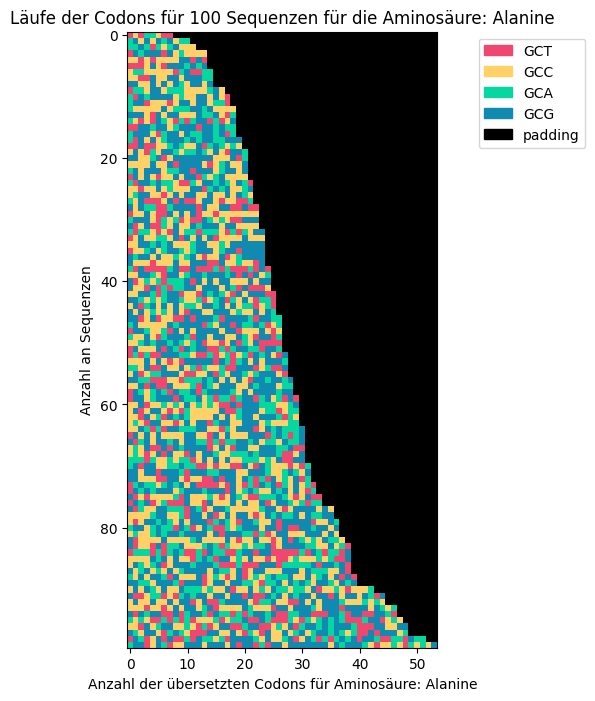

In [414]:
def visualize_runs(df_only_codon, selected_aa, colors):
    # create a colormap
    cmap = ListedColormap(colors)
    # Plotting
    plt.figure(figsize=(4, 8))
    plt.imshow(df_only_codon, aspect='auto', cmap=cmap, vmin=0, vmax=5)
    plt.xlabel(f'Anzahl der übersetzten Codons für Aminosäure: {selected_aa[1]}')
    plt.title(f'Läufe der Codons für {color_matrix.shape[0]} Sequenzen für die Aminosäure: {selected_aa[1]}')
    plt.ylabel('Anzahl an Sequenzen')  # Hide y-axis ticks
    # Create a custom legend
    unique_codon_ids = list(set(range(0, len(translation_table[selected_aa[0]]))))
    unique_selected_codons = [translation_table[selected_aa[0]][i] for i in unique_codon_ids]
    patches = [mpl.patches.Patch(color=colors[i % len(colors)], label=unique_selected_codons[i]) for i in range(len(unique_selected_codons))]
    patches.append(mpl.patches.Patch(color=colors[-1], label='padding'))
    plt.legend(handles=patches, loc='upper right', bbox_to_anchor=(1.5, 1))

    plt.show()


visualize_runs(color_matrix_only_codon, selected_aa=selected_amino_acid, colors=colors)

- ausschießlich Codons die zur Aminosäure gehören
- verkürzte länge der Sequenzen durch entfernen der anderen Codons

- $a$       = beliebige Aminosäure
- $c$       = beliebiges Codon
- $c\{a\}$  = codon was $a$ codiert
- $S_{ca}$  = Sequenzen von $c\{a\}$
- $M_{ca}$  = Matrix von $S_{ca}$

Somit wird hier $M_{ca}$ mit einen padding dargestellt


In [395]:
# Convert color_matrix to a 2D numpy array
color_matrix = np.array(color_matrix)
# color matrix to dataframe
df = pd.DataFrame(color_matrix)
# for each position in the matrix, we want to count the number of times a color appears
color_counts = df.apply(pd.Series.value_counts, axis=0).fillna(0)

# drop the last which is the padding
color_counts = color_counts.drop(color_padding)
color_counts = color_counts.drop(color_default)

# create a list with colors for each column with the highest count
color_max = []
color_min = []
count_max = []
count_min = []
for col in color_counts.columns:
    if color_counts[col].sum() == 0:
        color_max.append(color_padding)
        color_min.append(color_padding)
        count_max.append(0)
        count_min.append(0)
        continue
    # get the color with the highest count
    color_max.append(color_counts[col].idxmax())
    color_min.append(color_counts[col].idxmin())

    count_max.append(color_counts[col].max())
    count_min.append(color_counts[col].min())

df

,0,1,2,3,4,5,6,7,8,9,...,394,395,396,397,398,399,400,401,402,403
0,4,4,4,4,4,4,4,4,4,4,...,5,5,5,5,5,5,5,5,5,5
1,4,4,4,4,4,4,4,4,4,4,...,5,5,5,5,5,5,5,5,5,5
2,4,4,4,4,4,4,4,4,4,4,...,5,5,5,5,5,5,5,5,5,5
3,4,4,4,4,4,4,4,4,4,4,...,5,5,5,5,5,5,5,5,5,5
4,4,4,4,4,4,4,4,2,4,4,...,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4,0,4,4,4,4,4,4,4,4,...,5,5,5,5,5,5,5,5,5,5
96,4,4,4,4,4,4,4,4,4,4,...,5,5,5,5,5,5,5,5,5,5
97,4,4,4,4,4,4,4,0,4,4,...,5,5,5,5,5,5,5,5,5,5
98,4,4,4,4,4,4,4,4,4,4,...,4,4,2,4,4,5,5,5,5,5


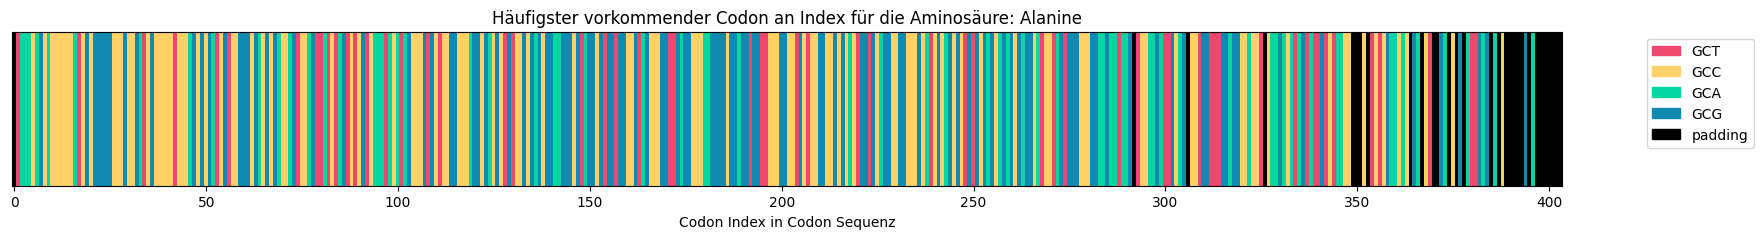

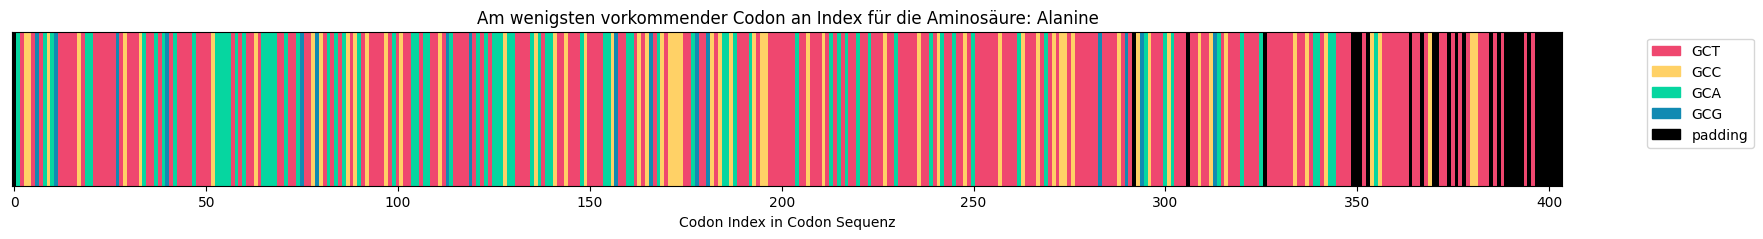

In [396]:
def visualize_max_min(colors, color_list, selected_aa, legend_text):

    cmap = ListedColormap(colors)
        # plot color_counts
    plt.figure(figsize=(20, 2))
    plt.imshow([color_list], aspect='auto', cmap=cmap, vmin=0, vmax=5)
    plt.xlabel('Codon Index in Codon Sequenz')
    plt.title(legend_text)
    plt.yticks([])  # Hide y-axis ticks

    # Create a custom legend
    unique_codon_ids = list(set(range(0, len(translation_table[selected_aa[0]]))))
    unique_selected_codons = [translation_table[selected_aa[0]][i] for i in unique_codon_ids]
    patches = [mpl.patches.Patch(color=colors[i % len(colors)], label=unique_selected_codons[i]) for i in range(len(unique_selected_codons))]
    patches.append(mpl.patches.Patch(color=colors[-1], label='padding'))
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


legend_text = f'Häufigster vorkommender Codon an Index für die Aminosäure: {selected_amino_acid[1]}'
visualize_max_min(colors, color_max, selected_aa=selected_amino_acid, legend_text=legend_text)

legend_text = f'Am wenigsten vorkommender Codon an Index für die Aminosäure: {selected_amino_acid[1]}'
visualize_max_min(colors, color_min, selected_aa=selected_amino_acid, legend_text=legend_text)

- für jeden Index wird die Farbe des Codons dargstellt, die für diesen Index am häufigsten/seltestens auftritt
- padding und hohe varianz am Ende durch unterschiedliche Sequenzlängen
- vermehrt eine Farbe durch Codon Usage Bias erklärbar
- $c:i$         = Codon c tritt an Index i auf (Indizierung beginnt bei 1)

- $C$   = Matrix von $c:i$ für jedes $c_a$ in Sequenz

- n:                  Anzahl Codons in Sequenz
- Für jede Spalte:    j = 1, 2, ..., n:
    - Finde die Zahl:     x_j mit der höchsten Summe in Spalte j

- Hier wird folgende Sequenz dargestellt: $\underset{j=1}{\overset{n}{\text{max}}} (C_{j})$ und $\underset{j=1}{\overset{n}{\text{min}}} (C_{j})$

# Bereinigung des Codon Usage Bias
- n = Anzahl unterschiedlicher synonymer Codons
- Codon Usage Bias für Aminosäure $CUB = \{c_1,c_2,...,c_n\} $

- nun kann für jeden Index der Sequenz die Häufigkeit mit den Biases dividiert werden:
    - Codon Sequenzen ($C_s$) 
    - $B$ (bereinigte Sequenz) = $\{c / CUB_c ∣ c ∈ C_s \}$

- dieser Prozess kann sich auch als 2 Dimensionaler Array vorgestellt werden:
    - Spalte = Index in der Sequenz
    - Reihe = Häufigkeit des gewählten Codons
    - nun würde jede Spalte mit den Biases dividiert werden



In [397]:
usage_bias = pd.read_pickle("../data/E.Coli/usageBias.pkl")
# get the usage bias for the selected_aa
usage_bias_selected_aa = usage_bias[selected_amino_acid[0]]
# map the keys the usage bias based on the lookup table
usage_bias_selected_aa = {key: round(usage_bias_selected_aa[key],2) for key in translation_table[selected_amino_acid[0]]}

# cleaned up the bias
cleaned_color = color_counts.copy()
# match keys to the dataframe
usage_bias_series = {new_key: usage_bias_selected_aa[old_key] for new_key, old_key in zip(range(len(usage_bias_selected_aa)), usage_bias_selected_aa)}
# Multiply each column in cleaned_color with the corresponding value in anti_usage_bias
cleaned_color = cleaned_color.div(usage_bias_series, axis=0)

# get the relative values
cleaned_rel = cleaned_color.div(cleaned_color.sum(axis=0), axis=1)
# get the relative bias
cleaned_rel_bias = round(cleaned_rel.sum(axis=1) / len(cleaned_rel.columns),2)
print('cleaned bias', dict(cleaned_rel_bias))
print('sum of cleaned bias', round(cleaned_rel_bias.sum(),2))


cleaned bias {0: 0.22, 1: 0.23, 2: 0.24, 3: 0.24}
sum of cleaned bias 0.93


In [398]:
# create a list with colors for each column with the highest count
clean_color_max = []
clean_color_min = []
clean_count_max = []
clean_count_min = []
for col in cleaned_color.columns:
    if cleaned_color[col].sum() == 0:
        clean_color_max.append(color_padding)
        clean_color_min.append(color_padding)
        clean_count_max.append(0)
        clean_count_min.append(0)
        continue
    # get the color with the highest count
    clean_color_max.append(cleaned_color[col].idxmax())
    clean_color_min.append(cleaned_color[col].idxmin())

    clean_count_max.append(cleaned_color[col].max())
    clean_count_min.append(cleaned_color[col].min())


print('clean_color_max', clean_color_max)
print('clean_color_min', clean_color_min)
print('clean_count_max', clean_count_max)
print('clean_count_min', clean_count_min)


clean_color_max [5, 0, 2, 2, 2, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 3, 1, 3, 2, 3, 3, 2, 1, 1, 1, 0, 2, 1, 3, 2, 0, 1, 1, 0, 1, 1, 1, 2, 0, 2, 1, 2, 2, 1, 1, 2, 1, 3, 0, 0, 0, 0, 0, 1, 1, 3, 0, 2, 1, 0, 2, 1, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 2, 3, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 3, 0, 1, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 2, 2, 0, 2, 2, 3, 3, 1, 1, 1, 2, 3, 0, 1, 3, 2, 1, 0, 1, 0, 3, 0, 1, 1, 3, 2, 0, 2, 0, 1, 3, 3, 2, 2, 3, 2, 3, 1, 3, 0, 2, 2, 3, 1, 3, 0, 3, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 3, 2, 0, 0, 0, 2, 3, 0, 1, 0, 1, 2, 2, 3, 2, 0, 1, 1, 0, 0, 2, 3, 3, 0, 0, 3, 0, 0, 1, 2, 1, 3, 3, 1, 1, 0, 1, 1, 0, 1, 1, 2, 3, 1, 0, 0, 0, 3, 0, 2, 1, 0, 3, 0, 0, 0, 1, 2, 0, 3, 0, 1, 2, 3, 1, 1, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 0, 2, 1, 0, 3, 0, 3, 1, 3, 2, 3, 1, 2, 3, 2, 3, 1, 0, 2, 3, 3, 1, 2, 0, 0, 1, 0, 2, 3, 0, 3, 3, 3, 1, 1, 1, 3, 3, 2, 2, 0, 2, 2, 0, 2, 2, 3, 5, 0, 1, 1, 2, 2, 3, 2, 0, 0, 3, 1, 2, 2, 5, 2, 2, 0, 3, 3, 0, 0, 0, 3, 0, 2, 0, 3, 1, 2, 2, 1, 1, 0, 5, 1,

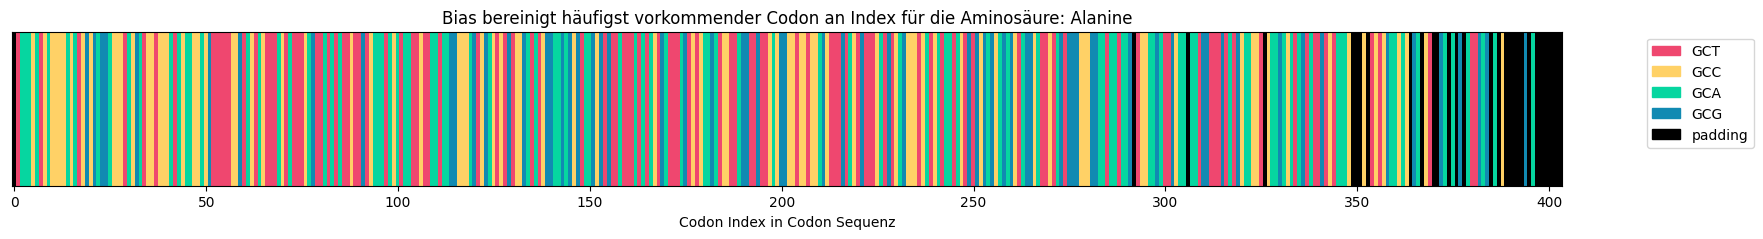

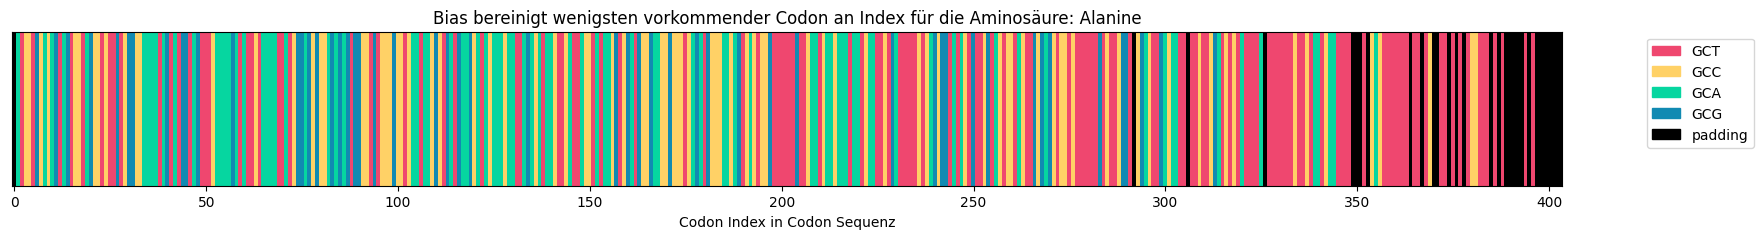

In [399]:

legend_text = f'Bias bereinigt häufigst vorkommender Codon an Index für die Aminosäure: {selected_amino_acid[1]}'
visualize_max_min(colors, clean_color_max, selected_aa=selected_amino_acid, legend_text=legend_text)

legend_text = f'Bias bereinigt wenigsten vorkommender Codon an Index für die Aminosäure: {selected_amino_acid[1]}'
visualize_max_min(colors, clean_color_min, selected_aa=selected_amino_acid, legend_text=legend_text)

- Codon Usage Bias bereinigte darstellung von max und min vorkommen der Codons
- $CB$ (bereinigte Matrix)
- Für jede Spalte:    j = 1, 2, ..., n:
- Hier wird folgende Sequenz dargestellt: $\underset{j=1}{\overset{n}{\text{max}}} (CB_{j})$ und $\underset{j=1}{\overset{n}{\text{min}}} (CB_{j})$

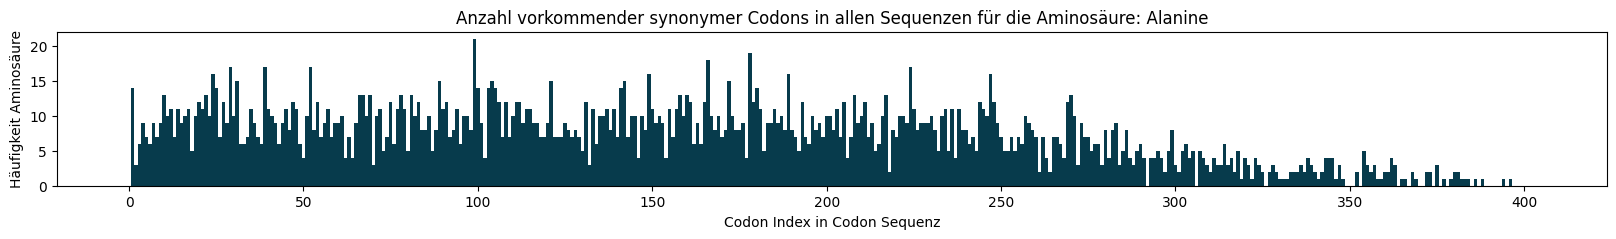

In [400]:
color_sum = color_counts.sum(axis=0)

def visualize_sum(color_sum, colors, legend_text):
    # plot color_counts
    plt.figure(figsize=(20, 2))
    # bar plot where the count_max is shown and the color is the color_max
    plt.bar(range(len(color_sum)), list(color_sum), color=colors[-2], width=1)
    plt.xlabel('Codon Index in Codon Sequenz')
    plt.title(legend_text)
    plt.ylabel('Häufigkeit Aminosäure')   # Hide y-axis ticks
    plt.show()

legend_text = f'Anzahl vorkommender synonymer Codons in allen Sequenzen für die Aminosäure: {selected_amino_acid[1]}'
visualize_sum(color_sum, colors=colors, legend_text=legend_text)

 - $G\{a\}:i$ = Gesamtanzahl an Kodierungen der Aminosäure $a$ über Sequenzen an index $i$


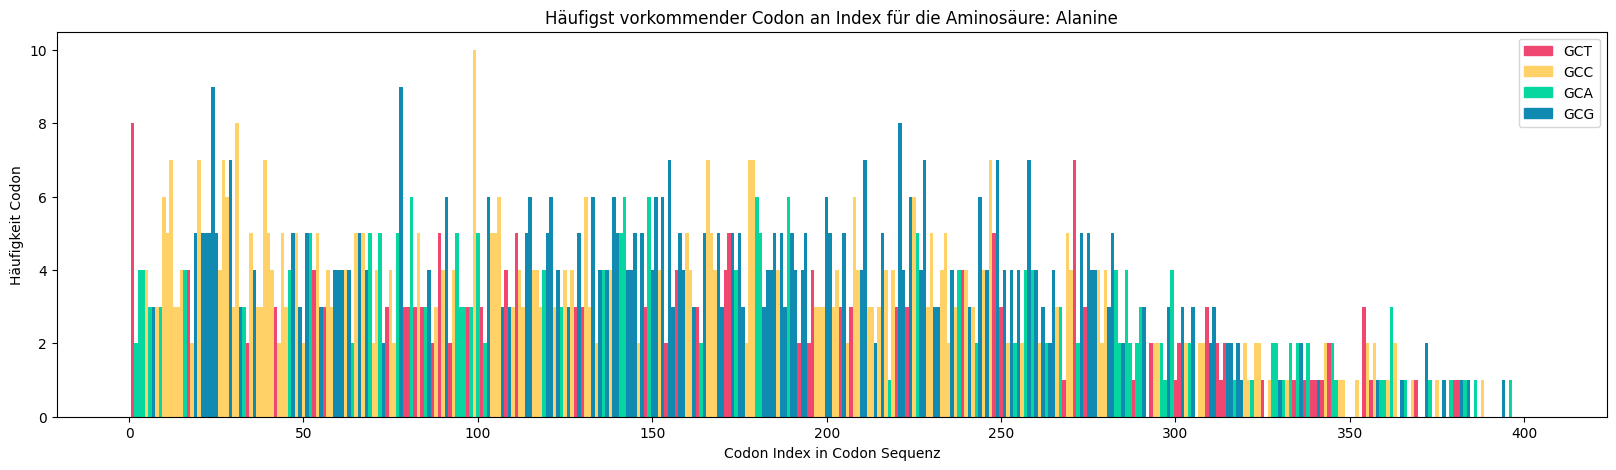

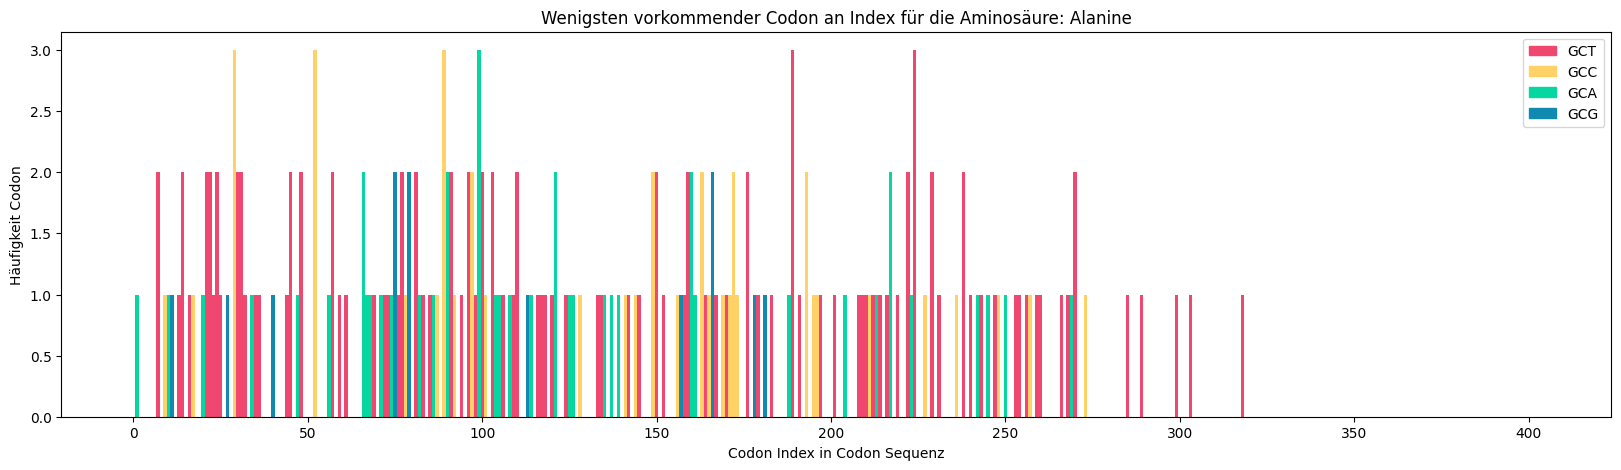

In [401]:
def visualize_amount(count_list, color_list, selected_aa, colors, title_text):
    # plot color_counts
    plt.figure(figsize=(20, 5))
    # bar plot where the count_max is shown and the color is the color_max
    plt.bar(range(len(count_list)), list(count_list), color=[colors[idx] for idx in color_list], width=1)
    plt.xlabel('Codon Index in Codon Sequenz')
    plt.title(title_text)
    plt.ylabel('Häufigkeit Codon')   # Hide y-axis ticks
    unique_codon_ids = list(set(range(0, len(translation_table[selected_aa[0]]))))
    unique_selected_codons = [translation_table[selected_aa[0]][i] for i in unique_codon_ids]
    patches = [mpl.patches.Patch(color=colors[i % len(colors)], label=unique_selected_codons[i]) for i in range(len(unique_selected_codons))]
    plt.legend(handles=patches, loc='upper right')
    plt.show()


title = f'Häufigst vorkommender Codon an Index für die Aminosäure: {selected_amino_acid[1]}'
visualize_amount(count_max, color_max, selected_aa=selected_amino_acid, colors=colors, title_text=title)
title = f'Wenigsten vorkommender Codon an Index für die Aminosäure: {selected_amino_acid[1]}'
visualize_amount(count_min, color_min, selected_aa=selected_amino_acid, colors=colors, title_text=title)

- die Farbe representiert welches Codon am häufigsten gewählt wurde
- die Häufigkeit zeigt an wie häufig dieses Codon gewählt wurde

- $G\_c\{a\}:i$ = Gesamtanzahl an Kodierungen des Codons $c$ über Sequenzen an index $i$

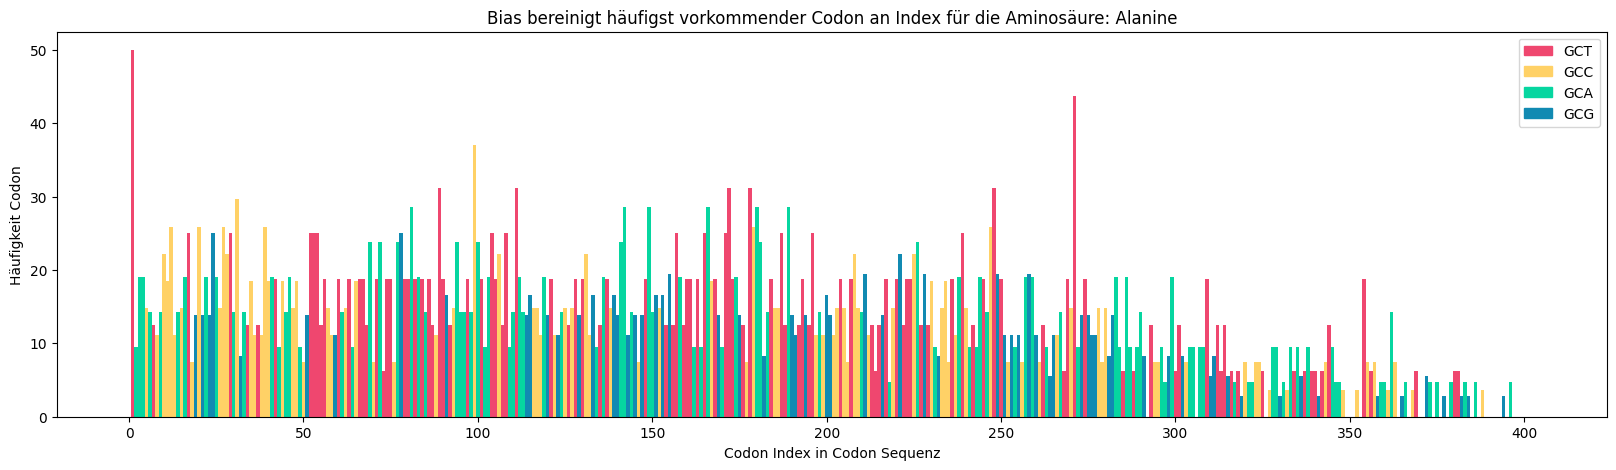

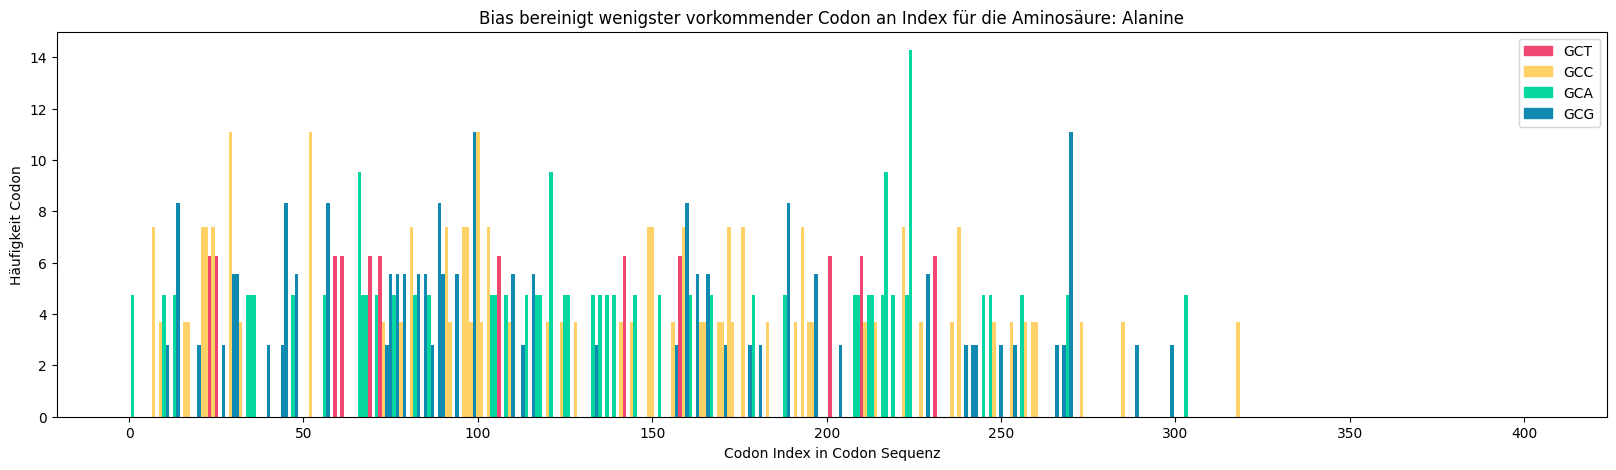

In [402]:
title = f'Bias bereinigt häufigst vorkommender Codon an Index für die Aminosäure: {selected_amino_acid[1]}'
visualize_amount(clean_count_max, clean_color_max, selected_aa=selected_amino_acid, colors=colors, title_text=title)
title = f'Bias bereinigt wenigster vorkommender Codon an Index für die Aminosäure: {selected_amino_acid[1]}'
visualize_amount(clean_count_min, clean_color_min, selected_aa=selected_amino_acid, colors=colors, title_text=title)

- $G\_c\{a\}:i$ = Gesamtanzahl an Kodierungen des Codons $c$ über bereinigte Sequenzen an index $i$

In [403]:
# for each position in the matrix, we want to count the number of times a color appears
df_bias_abs = df.apply(pd.Series.value_counts, axis=0).fillna(0)
# drop the last which is the padding
df_bias_abs = df_bias_abs.drop(color_padding)
df_bias_abs = df_bias_abs.drop(color_default)
# calculate the relative bias
df_bias_rel = df_bias_abs / df_bias_abs.sum()

# Fill NaN values with 0
df_bias_rel = df_bias_rel.fillna(0)
df_bias_rel

,0,1,2,3,4,5,6,7,8,9,...,394,395,396,397,398,399,400,401,402,403
0,0.0,0.571429,0.000000,0.166667,0.333333,0.000000,0.333333,0.222222,0.142857,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.142857,0.333333,0.000000,0.000000,0.571429,0.166667,0.222222,0.428571,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.071429,0.666667,0.666667,0.444444,0.142857,0.500000,0.222222,0.000000,0.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.214286,0.000000,0.166667,0.222222,0.285714,0.000000,0.333333,0.428571,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Codon Index Rate (CIR) 
Anteil des Auftretens eines bestimmten “synonymen” Codons an einem bestimmten Index

Für ein einzelnes Codon c{a} wird die CIR für Index i wie folgt berechnet:

$CIR\_c\{a\}:i = G\_c\{a\}:i / G\_a:i$

Nimmt Werte zwischen 0 (Codon wird nicht verwendet) und 1 (Codon wird ausschließlich verwendet) an

Problem: Ist nicht definiert, wenn Aminosäure a nie an Index i kodiert wird innerhalb der Menge an betrachteten Sequenzen


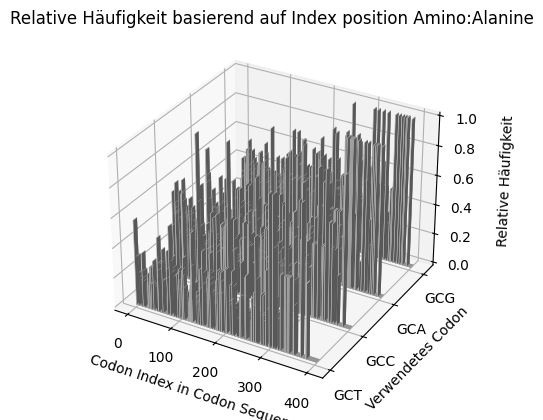

<Figure size 1000x1500 with 0 Axes>

In [404]:
def visualize_3d_abs(df_bias_rel, selected_aa, colors):
    # Assuming df is your DataFrame and it's already defined
    x = np.arange(df_bias_rel.shape[1])  # x axis - columns of the DataFrame
    y = np.arange(df_bias_rel.shape[0])  # y axis - rows of the DataFrame
    x, y = np.meshgrid(x, y)
    z = df_bias_rel.values  # z axis - values of the DataFrame

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

        # Define your colors
    #colors = ['red', 'green', 'blue', 'yellow', 'lightgrey']

    # Flatten your data
    x_data = x.flatten()
    y_data = y.flatten()
    z_data = z.flatten()

    color_arr = np.array(['lightgrey' for i in z_data])
    # every 2nd element color 0
    #color_arr[1::100] = colors[0]

    
    # Plot a basic wireframe
    x_width = 1
    y_depth = 0.1
    ax.bar3d(x_data, y_data, np.zeros(len(z_data)), x_width, y_depth, z_data, color=color_arr)

    ax.set_xlabel('Codon Index in Codon Sequenz')
    ax.set_ylabel('Verwendetes Codon')
    ax.set_zlabel('Relative Häufigkeit', labelpad=10)

    ax.set_yticks(range(len(translation_table[selected_aa[0]])))
    ax.set_yticklabels(translation_table[selected_aa[0]])

    plt.title(f'Relative Häufigkeit basierend auf Index position Amino:{selected_aa[1]}')
    plt.figure(figsize=(10,15))
    plt.tight_layout()  # Adjust layout
    plt.show()





visualize_3d_abs(df_bias_rel, selected_aa=selected_amino_acid, colors=colors)

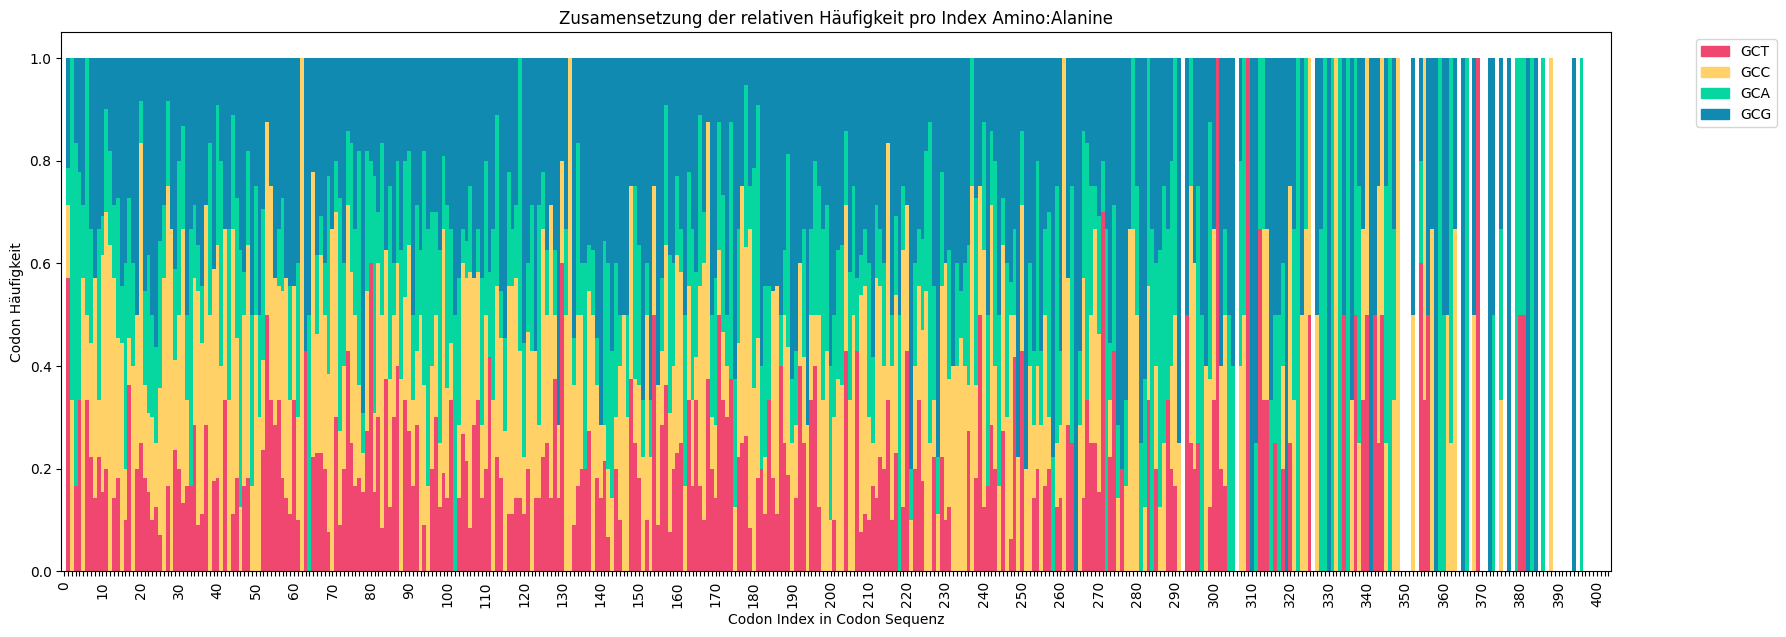

In [405]:
def visualize_stacked_rel(df_bias_rel, selected_aa, colors, title):
    # Transpose the DataFrame
    df_transposed = df_bias_rel.T

    # Create a stacked bar plot
    ax = df_transposed.plot.bar(stacked=True, color=colors, figsize=(20, 7), width=1)

    # ax set x axis to range from 0 to the number of columns in the DataFrame
    ax.set_xticks(range(df_transposed.shape[0]))
    # dont display each number on the x-axis only every 10th
    ax.set_xticklabels([i if i % 10 == 0 else '' for i in range(df_transposed.shape[0])])

    # Add labels and title
    ax.set_xlabel('Codon Index in Codon Sequenz')
    ax.set_ylabel('Codon Häufigkeit')
    ax.set_title(title)
    # Create a custom legend
    unique_codon_ids = list(set(range(0, len(translation_table[selected_aa[0]]))))
    unique_selected_codons = [translation_table[selected_aa[0]][i] for i in unique_codon_ids]
    patches = [mpl.patches.Patch(color=colors[i % len(colors)], label=unique_selected_codons[i]) for i in range(len(unique_selected_codons))]
    ax.legend(handles=patches,bbox_to_anchor=(1.05, 1), loc='upper left')

    # Display the plot
    plt.show()
title= 'Zusamensetzung der relativen Häufigkeit pro Index Amino:' + selected_amino_acid[1]
visualize_stacked_rel(df_bias_rel, selected_aa=selected_amino_acid, colors=colors, title=title)

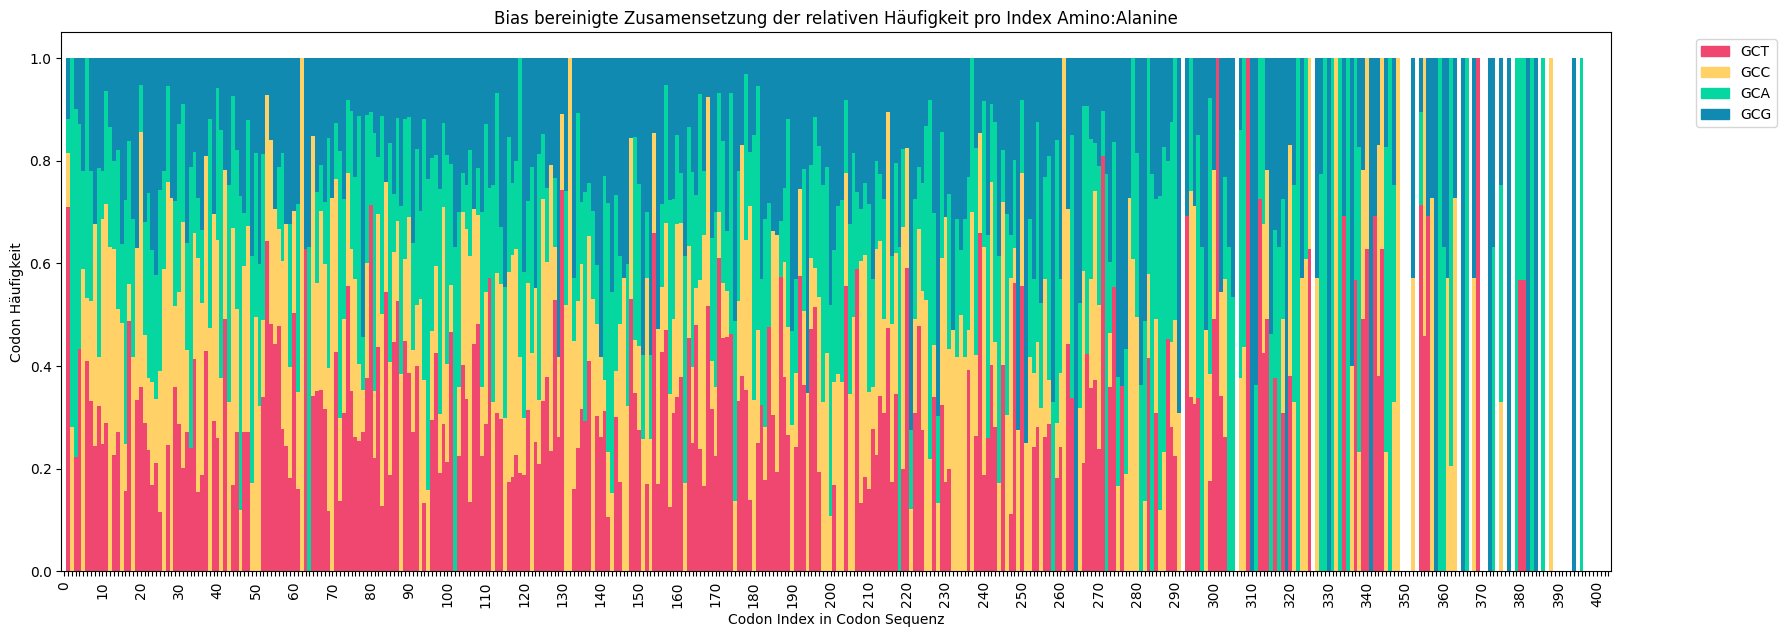

In [406]:
title= 'Bias bereinigte Zusamensetzung der relativen Häufigkeit pro Index Amino:' + selected_amino_acid[1]
visualize_stacked_rel(cleaned_rel, selected_aa=selected_amino_acid, colors=colors, title=title)

## Bias Corrected Codon Index Rate (BCCIR) 
Anteil des Auftretens eines bestimmten “synonymen” Codons an einem bestimmten Index nach der Bias bereinigung

Für ein einzelnes Codon c{a} wird die BCCIR für Index i wie folgt berechnet:

- $b\_c$ = Bias für entsprechendes Codon

$BCCIR\_c\{a\}:i = $CIR\_c\{a\}:i / b\_c$



In [407]:
df_bias_rel.index = translation_table[selected_amino_acid[0]].copy()

rounded_usage_bias_selected_aa = {key: round(value, 2) for key, value in usage_bias_selected_aa.items()}
print(rounded_usage_bias_selected_aa)



# subtract the usage bias
#df_bias_sub = df_bias_rel.sub(usage_bias_selected_aa, axis=0)
df_bias_sub = df_bias_rel.copy()

# map the usage bias to the index
mapped_usage_bias = df_bias_sub.index.map(usage_bias_selected_aa)

# iter column wise and subtract usage bias
for col in df_bias_rel.columns:
    # if sum of col is 0, we skip it
    if df_bias_rel[col].sum() == 0:
        continue
    df_bias_sub[col] = df_bias_sub[col] - mapped_usage_bias

# Fill NaN values with 0
df_bias_sub = df_bias_sub.fillna(0)
df_bias_sub

{'GCT': 0.16, 'GCC': 0.27, 'GCA': 0.21, 'GCG': 0.36}


,0,1,2,3,4,5,6,7,8,9,...,394,395,396,397,398,399,400,401,402,403
GCT,0.0,0.411429,-0.160000,0.006667,0.173333,-0.160000,0.173333,0.062222,-0.017143,0.062222,...,-0.16,0.0,-0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCC,0.0,-0.127143,0.063333,-0.270000,-0.270000,0.301429,-0.103333,-0.047778,0.158571,-0.158889,...,-0.27,0.0,-0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCA,0.0,-0.138571,0.456667,0.456667,0.234444,-0.067143,0.290000,0.012222,-0.210000,0.123333,...,-0.21,0.0,0.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCG,0.0,-0.145714,-0.360000,-0.193333,-0.137778,-0.074286,-0.360000,-0.026667,0.068571,-0.026667,...,0.64,0.0,-0.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Bias Subtracted Codon Index Rate (BSCIR) 
Differenz zwischen gesamten Biases und den index spezifischen Biases

Für ein einzelnes Codon c{a} wird die BSCIR für Index i wie folgt berechnet:

- $b\_c$ = Bias für entsprechendes Codon

$BSCIR\_c\{a\}:i = $CIR\_c\{a\}:i - b\_c$


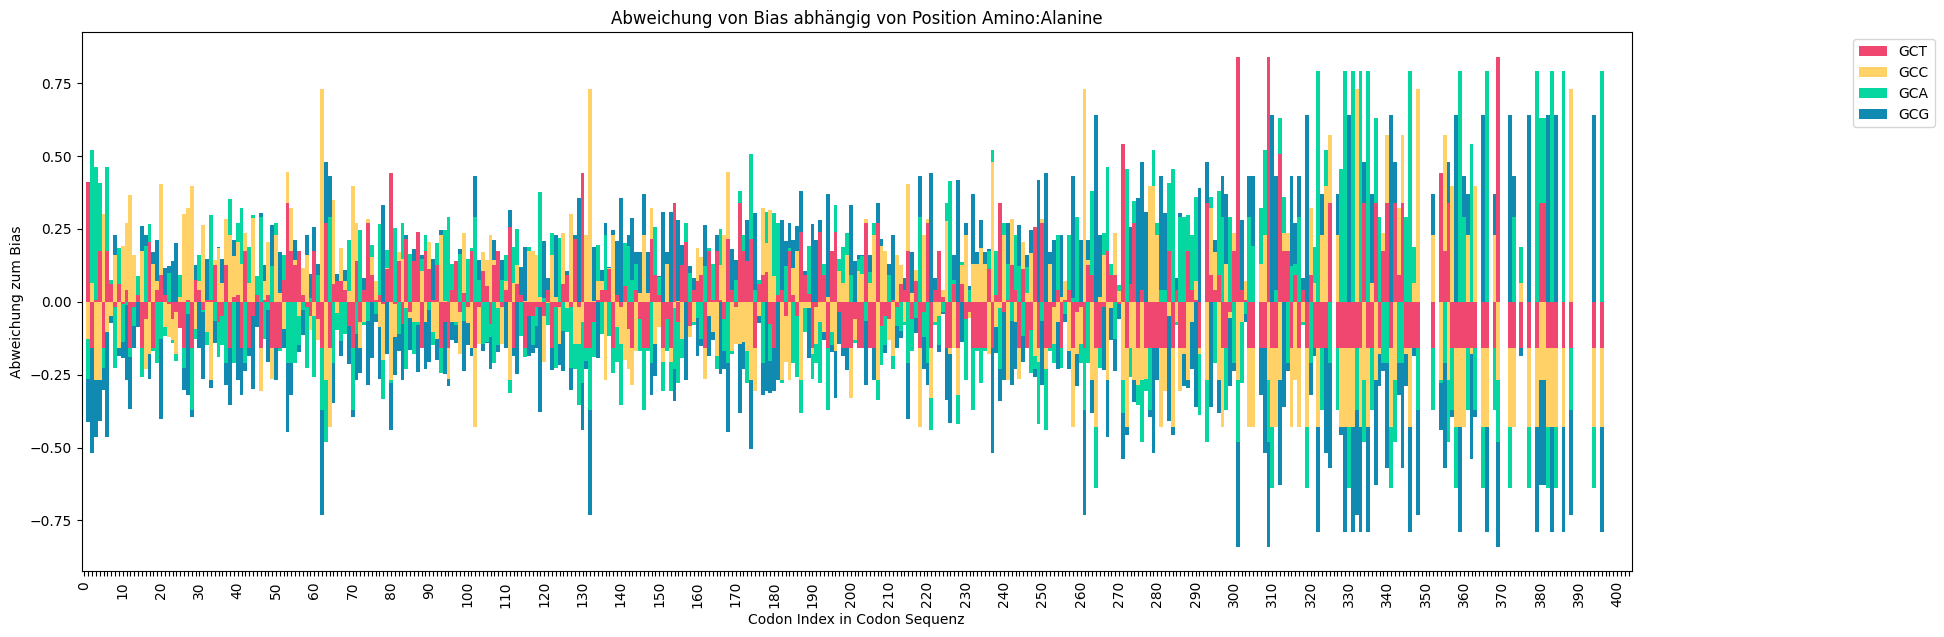

In [408]:
def visualize_stacked_sub(df_bias_sub, selected_aa, colors):
    # Transpose the DataFrame
    df_transposed = df_bias_sub.T

    # Create a stacked bar plot
    ax = df_transposed.plot.bar(stacked=True, color=colors, figsize=(20, 7), width=1)

    # ax set x axis to range from 0 to the number of columns in the DataFrame
    ax.set_xticks(range(df_transposed.shape[0]))
    # dont display each number on the x-axis only every 10th
    ax.set_xticklabels([i if i % 10 == 0 else '' for i in range(df_transposed.shape[0])])

    # Add labels and title
    ax.set_xlabel('Codon Index in Codon Sequenz')
    ax.set_ylabel('Abweichung zum Bias')
    ax.set_title('Abweichung von Bias abhängig von Position Amino:' + selected_aa[1])

    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

    # Display the plot
    plt.show()

visualize_stacked_sub(df_bias_sub, selected_aa=selected_amino_acid, colors=colors)

- hier wurde der Bias von der relativen Häufigkeit abgezogen
- negative Werte zeigen wenn ein Codon unterrepresentiert wurde

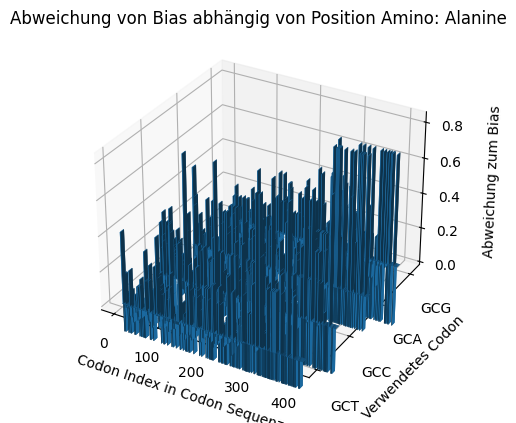

<Figure size 1000x1500 with 0 Axes>

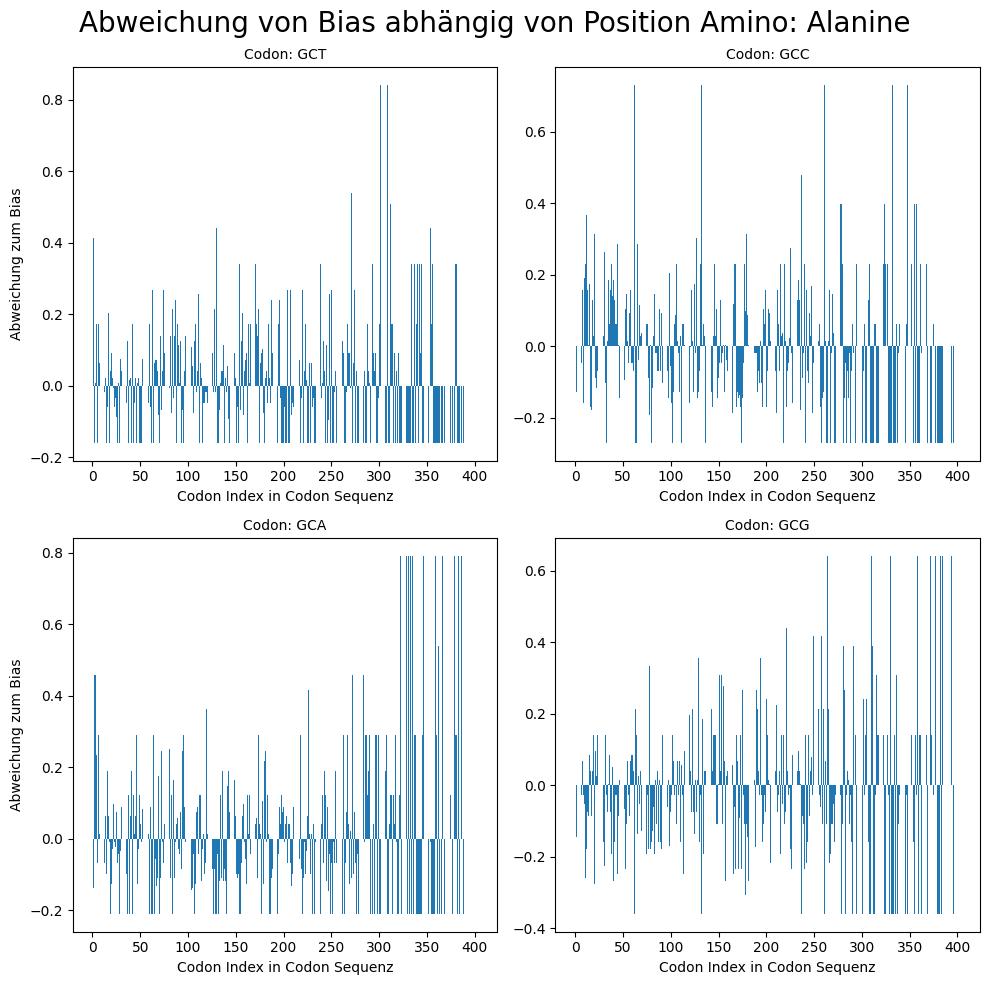

In [409]:
def visualize_3d_rel(df_bias_sub, selected_aa, colors):
    x = np.arange(df_bias_sub.shape[1])  # x axis - columns of the DataFrame
    y = np.arange(df_bias_sub.shape[0])  # y axis - rows of the DataFrame
    x, y = np.meshgrid(x, y)
    z = df_bias_sub.values  # z axis - values of the DataFrame

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot a basic wireframe
    x_width = 1
    y_depth = 0.1
    ax.bar3d(x.flatten(), y.flatten(), np.zeros(len(z.flatten())), x_width, y_depth, z.flatten())

    ax.set_xlabel('Codon Index in Codon Sequenz')
    ax.set_ylabel('Verwendetes Codon')
    ax.set_zlabel('Abweichung zum Bias', labelpad=10)

    ax.set_yticks(range(len(translation_table[selected_aa[0]])))
    ax.set_yticklabels(translation_table[selected_aa[0]], position=(5, 0))
    # move y axis label to the right
    ax.tick_params(axis='y', which='major', pad=10)
    # move y label to the right
    ax.yaxis.labelpad = 10


    plt.title(f'Abweichung von Bias abhängig von Position Amino: {selected_aa[1]}')
    plt.figure(figsize=(10,15))
    plt.tight_layout()  # Adjust layout
    plt.show()

    main_title_size = 20
    title_size = 10
    label_size = 10

    # new plots 2x2
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle(f'Abweichung von Bias abhängig von Position Amino: {selected_aa[1]}', fontsize=main_title_size)
    fig.subplots_adjust(top=5)
    # each codon a different subplot, so only row
    df_1 = df_bias_sub.iloc[0]
    df_2 = df_bias_sub.iloc[1]
    df_3 = df_bias_sub.iloc[2]
    df_4 = df_bias_sub.iloc[3]


    # Plot for df_1
    ax[0, 0].bar(df_1.index, df_1.values)
    ax[0, 0].set_title(f'Codon: {translation_table[selected_aa[0]][0]}', size=title_size)
    ax[0, 0].set_xlabel('Codon Index in Codon Sequenz', size=label_size)
    ax[0, 0].set_ylabel('Abweichung zum Bias', size=label_size)

    # Plot for df_2
    ax[0, 1].bar(df_2.index, df_2.values)
    ax[0, 1].set_title(f'Codon: {translation_table[selected_aa[0]][1]}', size=title_size)
    ax[0, 1].set_xlabel('Codon Index in Codon Sequenz', size=label_size)

    # Plot for df_3
    ax[1, 0].bar(df_3.index, df_3.values)
    ax[1, 0].set_title(f'Codon: {translation_table[selected_aa[0]][2]}', size=title_size)
    ax[1, 0].set_xlabel('Codon Index in Codon Sequenz', size=label_size)
    ax[1, 0].set_ylabel('Abweichung zum Bias', size=label_size)

    # Plot for df_4
    ax[1, 1].bar(df_4.index, df_4.values)
    ax[1, 1].set_title(f'Codon: {translation_table[selected_aa[0]][3]}', size=title_size)
    ax[1, 1].set_xlabel('Codon Index in Codon Sequenz', size=label_size)


    plt.tight_layout()
    plt.show()



visualize_3d_rel(df_bias_sub, selected_aa=selected_amino_acid, colors=colors)

In [410]:
#TODO: 3d plot for all amino acids

def get_df_bias_subs(aminos):
    dfs = []
    for aa in aminos:
        color_matrix = get_color_matrix(records, show_records=252, selected_aa=aa, colors=colors, len_threshold=0.3)
        df = pd.DataFrame(color_matrix)

        # for each position in the matrix, we want to count the number of times a color appears
        df_bias_abs = df.apply(pd.Series.value_counts, axis=0).fillna(0)
        # drop the last which is the padding
        df_bias_abs = df_bias_abs.drop(color_padding)
        df_bias_abs = df_bias_abs.drop(color_default)

        # calculate the relative bias
        df_bias_rel = df_bias_abs / df_bias_abs.sum()
        # Fill NaN values with 0
        df_bias_rel = df_bias_rel.fillna(0)
        print(df_bias_rel.index, translation_table[aa[0]])
        df_bias_rel.index = translation_table[aa[0]].copy()
        # subtract the usage bias
        #match the keys to the dataframe
        mapped_usage_bias = df_bias_rel.index.map(usage_bias[aa[0]])
        df_bias_sub = df_bias_rel.copy()
        df_bias_sub = df_bias_sub.sub(mapped_usage_bias, axis=0)

        #dfs.append((aa[1], df_bias_sub))
    return dfs


# get aminos where key len is bigger than 1
aminos = [aa for aa in possible_amino_acids if len(translation_table[aa[0]]) > 1]


#get_df_bias_subs(aminos)